In [1]:
#conda install -c anaconda graphviz
#conda install -c anaconda pydotplus
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = iris.values[:,:4]
data_columns = list(iris.columns.values[:4])

In [4]:
target=iris.values[:,4]
class_names = list(np.unique(iris.values[:,4]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [6]:
#clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(max_depth=2)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.9555555555555556


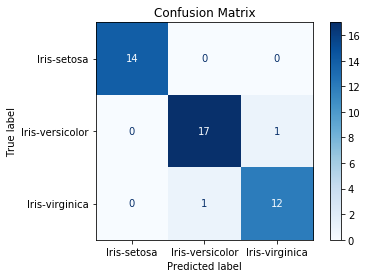

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

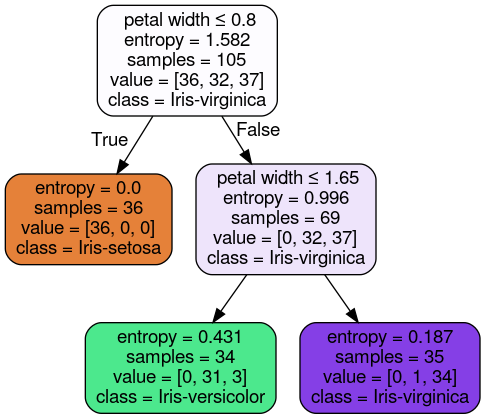

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('iris.png')
Image(graph.create_png())